# Data, Machines and the 🐍 
<img src="https://raw.githubusercontent.com/habermanUIUC/CodeStoryLessons/main/lessons/dmap/mlu/clustering/html/section00.png" align="left"/>

<a id="install"></a>
## Notebook Preparation for Lesson 1•2•3
Each lesson will start with a similar template (given in the course schedule):  
1. **save** to your google drive (copy to drive)<br/><img src="https://raw.githubusercontent.com/habermanUIUC/CodeStoryLessons/main/assets/images/colab/copy-to-drive.png"/>
2. **update** the NET_ID to be your netID (no need to include @illinois.edu)
3. **run** the next cell to install the IDE. <img src="https://raw.githubusercontent.com/habermanUIUC/CodeStoryLessons/main/assets/images/colab/play-button.png"/>

In [1]:
LESSON_ID = 'dmap:mlu:clustering'   # keep this as is
NET_ID    = 'jacanty2' # CHANGE_ME to your netID (keep the quotes)

def install_ide(net_id, lesson_id):
  import sys
  if 'codestories' not in sys.modules:
      print('installing modules')
      !pip install git+https://mehaberman@bitbucket.org/mehaberman/codestories.git --upgrade &> install.log
  
  from codestories.cs.CodeStories import CodeStory
  return CodeStory(net_id, lesson_id)

ide = install_ide(NET_ID, LESSON_ID)
print(ide.welcome())

installing modules
Telling the story: Clustering


# Lesson Clustering
(hit ▶ to read the first part of the lesson️)

In [3]:
# run to read the next section
ide.reader.view_section(1)

# finding patterns in a sea of data

In [ ]:
# run to read the next section
ide.reader.view_section(2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import LessonUtil as Util

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

def build_dataset():
  p = Util.path_for_data('canon.csv')
  # Importing the dataset
  df = pd.read_csv(p)

  keep = ['a', 'b', 'c', 'd', 'e', 'f']

  return df[keep]
  
data_df = build_dataset()
print(data_df.head(5))

          a    b         c         d         e         f
0  0.359148  0.2  0.343460  0.125000  0.129137  1.000000
1  0.109290  1.0  0.728682  0.646739  0.767139  0.684211
2  0.598361  0.2  0.054264  0.135870  0.092199  0.578947
3  0.191257  1.0  0.604651  0.510870  0.542553  0.736842
4  0.136612  1.0  0.857881  0.565217  0.634752  0.789474


In [ ]:
# run to read the next section
ide.reader.view_section(4)

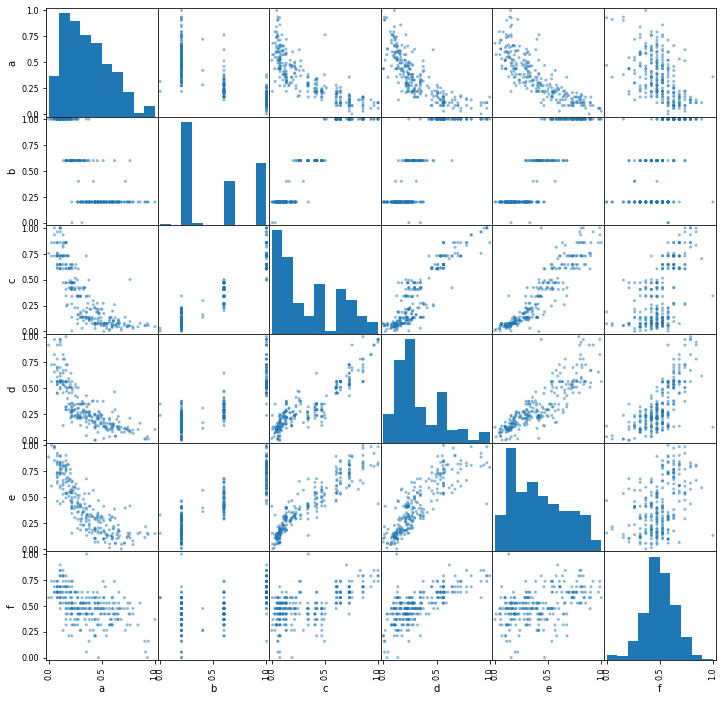

In [ ]:
def pair_wise_plots(df):
  axes = pd.plotting.scatter_matrix(df, figsize=(12,12))

pair_wise_plots(data_df)

In [ ]:
# run to read the next section
ide.reader.view_section(6)

# An Algorithmic Overview

In [ ]:
# run to read the next section
ide.reader.view_section(7)

# K-Means Clustering

In [ ]:
# run to read the next section
ide.reader.view_section(8)

In [ ]:
def build_dataset(as_is=False):
  p = Util.path_for_data('clean_cars.csv')
  # Importing the dataset
  df = pd.read_csv(p)
  if as_is:
    return df

  drop = ['brand', 'year'] #, 'cylinders']
  return df[df.columns.difference(drop)]
  
data_df = build_dataset()
print(data_df.head(5))

   cubicinches  cylinders        hp       mpg  time-to-60  weightlbs
0     0.343460        0.2  0.125000  0.359148    1.000000   0.129137
1     0.728682        1.0  0.646739  0.109290    0.684211   0.767139
2     0.054264        0.2  0.135870  0.598361    0.578947   0.092199
3     0.604651        1.0  0.510870  0.191257    0.736842   0.542553
4     0.857881        1.0  0.565217  0.136612    0.789474   0.634752


In [ ]:
# run to read the next section
ide.reader.view_section(10)

In [ ]:
def convert_to_points(df):
    p = []
    for c in df.columns:
      pc = df[c]
      p.append(pc)
    
    points = np.stack(p, axis=1)
    return points

points = convert_to_points(data_df)
print(data_df.head(5))
print(points[0:5,:])

   cubicinches  cylinders        hp       mpg  time-to-60  weightlbs
0     0.343460        0.2  0.125000  0.359148    1.000000   0.129137
1     0.728682        1.0  0.646739  0.109290    0.684211   0.767139
2     0.054264        0.2  0.135870  0.598361    0.578947   0.092199
3     0.604651        1.0  0.510870  0.191257    0.736842   0.542553
4     0.857881        1.0  0.565217  0.136612    0.789474   0.634752
[[0.34345974 0.2        0.125      0.35914829 1.         0.12913712]
 [0.72868217 1.         0.64673913 0.10928962 0.68421053 0.76713948]
 [0.05426357 0.2        0.13586957 0.59836066 0.57894737 0.09219858]
 [0.60465116 1.         0.51086957 0.19125683 0.73684211 0.54255319]
 [0.85788114 1.         0.56521739 0.13661202 0.78947368 0.63475177]]


In [ ]:
# run to read the next section
ide.reader.view_section(12)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

def cluster_points(points, K=6):
    km = KMeans(n_clusters=K,    # how many clusters
                max_iter=300,    # iterate 300 times, for a 'single run'
                n_init=100,      # run it 100 times, picking the best one
                init='random',   # pick random centers (provide your own, 'k-means++')
                random_state=42, # pick None to be different each time
                tol=0.0001)      # when to declare convergence between two consecutive iterations
    
    # points needs to be like
    # [x1,y1], [x2, y2], etc
    
    # build the model
    km.fit(points)

    centers = km.cluster_centers_
    print(centers)
    
    # pass the same data through the model, 
    # predict will assign the point to a label (cluster number)
    labels = km.predict(points)
    return km, labels

NameError: ignored

In [ ]:
# run to read the next section
ide.reader.view_section(14)

In [ ]:
def unclean_data_demo():
  p = Util.path_for_data('anon.csv')
  tmp_df = pd.read_csv(p)[['a','b','c']]
  print(tmp_df.head(5))
  tmp_df = tmp_df.dropna()
  km,lbls = cluster_points(tmp_df)
unclean_data_demo()

          a         b         c
0  0.615367  0.505843  0.437702
1 -0.619346  1.711555 -0.376951
2 -0.749748  1.969948  0.023749
3  0.849187 -1.291490  1.310602
4 -0.757987  1.826063 -0.582550
[[ 0.38852021  0.5088741   1.17611156]
 [ 0.62825614 -0.99638394  0.89756525]
 [ 0.30293257  0.51277466  0.25809571]
 [-0.91951084  1.59456004 -0.70702486]
 [ 0.64269051 -1.04940283 -0.25543002]
 [-0.83728869  1.69775503  0.42092543]]


In [ ]:
# run to read the next section
ide.reader.view_section(16)

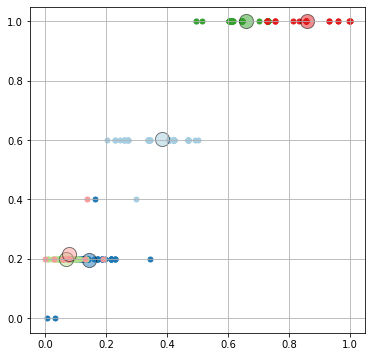

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_kmeans(points, centers, labels, x0=0, x1=1, columns=None):
    
    K = len(centers)
    colors=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
    cmap = matplotlib.colors.ListedColormap(colors)
    if len(colors) <= K:
      cmap = cm.Dark2
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    for c_id in range(0, K):
        mask = labels == c_id
        c = cmap(c_id)
        axes.scatter(points[mask][:, x0], points[mask][:, x1], color=c, s=25)
        # mark the center
        axes.scatter(centers[c_id, x0], centers[c_id, x1], color=c, s=200, alpha=0.5, edgecolor='black')

    if columns is not None:
      axes.set_xlabel(columns[x0], fontsize=18)
      axes.set_ylabel(columns[x1], fontsize=16)
    axes.grid()
    


plot_kmeans(points, km.cluster_centers_,labels)

In [ ]:
# run to read the next section
ide.reader.view_section(18)

# Finding K

In [ ]:
# run to read the next section
ide.reader.view_section(19)

In [ ]:
def plot_scores(scores, y="inertia score"):
    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.plot(scores[:, 0], scores[:, 1], color='blue', marker='x')
    axes.set_ylabel(y, fontsize=18)
    axes.set_xlabel('K', fontsize=18)
'''
def get_inertias(points):
  scores = []
  for k in range(2, 16):
     km, labels = cluster_points(points, K=k)
     scores.append((k, km.inertia_))
  print(km.inertia_)
  return np.array(scores)
  '''
# be sure to comment this call out, before testing
# it will cause a timeout during any submissions
'''
inertia_scores = get_inertias(points)
plot_scores(inertia_scores)
'''

'\ninertia_scores = get_inertias(points)\nplot_scores(inertia_scores)\n'

In [ ]:
# run to read the next section
ide.reader.view_section(21)

In [ ]:
from sklearn.metrics import silhouette_score
'''
def get_silhouette_scores(points):
  scores = []
  for k in range(2, 16):
     km, labels = cluster_points(points, K=k)
     s_score = silhouette_score(points,  km.labels_)
     scores.append((k, s_score))
  return np.array(scores)
'''
# be sure to comment this call out, before testing
# it will cause a timeout during any submissions
''''
sscores = get_silhouette_scores(points)
plot_scores(sscores, y='silhouette')
'''

"'\nsscores = get_silhouette_scores(points)\nplot_scores(sscores, y='silhouette')\n"

In [ ]:
# run to read the next section
ide.reader.view_section(23)

[[0.3803278  0.60689655 0.29628936 0.28052572 0.45009074 0.46563063]
 [0.1035178  0.19844961 0.17096394 0.52277816 0.43288454 0.20359404]
 [0.73112648 1.         0.62411868 0.13594742 0.65362731 0.73075602]]
3 {0, 1, 2}


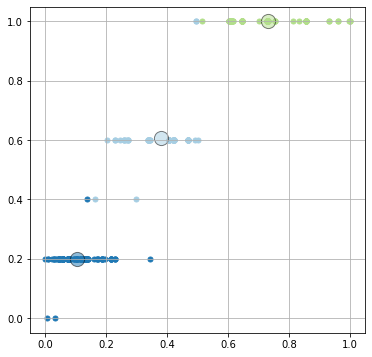

In [ ]:
def special_k():
    km, labels = cluster_points(points, K=3)
    print(len(km.cluster_centers_), set(labels))
    plot_kmeans(points, km.cluster_centers_, labels)

special_k()

In [ ]:
# run to read the next section
ide.reader.view_section(25)

# External Measures for Cluster Evaluation

In [ ]:
# run to read the next section
ide.reader.view_section(26)

In [ ]:
def get_distributions(df, points, K=3):
    km, labels = cluster_points(points, K=K)
    centers = km.cluster_centers_

    score = [{} for i in range(0, len(centers))]
    for idx, cluster_num in enumerate(labels):
        predict = cluster_num
        actual = df['brand'][idx]

        s = score[predict]
        v = s.get(actual, 0)
        s[actual] = v + 1

    return score

km, labels = cluster_points(points, K=3)
cars_df = build_dataset(as_is=True)
print(cars_df.groupby(['brand']).size())
print(get_distributions(cars_df, points, K=5))

[[0.3803278  0.60689655 0.29628936 0.28052572 0.45009074 0.46563063]
 [0.1035178  0.19844961 0.17096394 0.52277816 0.43288454 0.20359404]
 [0.73112648 1.         0.62411868 0.13594742 0.65362731 0.73075602]]
brand
0    161
1     48
2     52
dtype: int64
[[0.3821446  0.60357143 0.29512811 0.28068891 0.44924812 0.46659308]
 [0.66593535 1.         0.54511895 0.15316012 0.62562066 0.68252375]
 [0.14436605 0.19677419 0.23991935 0.39945568 0.47283531 0.27519446]
 [0.87749589 1.         0.80187747 0.10059613 0.71291866 0.83726897]
 [0.06714546 0.20294118 0.11013427 0.63166988 0.39705882 0.140606  ]]
[{1: 3, 0: 48, 2: 5}, {0: 53}, {2: 16, 1: 22, 0: 24}, {0: 22}, {1: 23, 0: 14, 2: 31}]


In [ ]:
# run to read the next section
ide.reader.view_section(28)

In [ ]:
import sklearn.metrics as metrics
labels_true = ['a','a','a',  'b','b','b']
labels_pred = [0,0,0, 1,1,1]
print(metrics.adjusted_mutual_info_score(labels_true, labels_pred))

1.0


In [ ]:
# run to read the next section
ide.reader.view_section(30)

# More than one way to cluster

In [ ]:
# run to read the next section
ide.reader.view_section(31)

# Lesson Assignment

In [ ]:
# run to read the next section
ide.reader.view_section(32)

In [ ]:
import LessonUtil as Util
import pandas as pd
'''
def get_robo_dataset():
  path = Util.path_for_data('robo.csv')
  df = pd.read_csv(path)
  return df

pitcher_df = get_robo_dataset()
pitcher_df.head()

def convert_to_points(df):
    p = []
    for c in df.columns:
      pc = df[c]
      p.append(pc)
    
    points = np.stack(p, axis=1)
    return points
a = convert_to_points(pitcher_df)
print(a)
   
km, labels = cluster_points(a)
print(len(km.cluster_centers_), set(labels))


plot_kmeans(a, km.cluster_centers_,labels)
'''

"\ndef get_robo_dataset():\n  path = Util.path_for_data('robo.csv')\n  df = pd.read_csv(path)\n  return df\n\npitcher_df = get_robo_dataset()\npitcher_df.head()\n\ndef convert_to_points(df):\n    p = []\n    for c in df.columns:\n      pc = df[c]\n      p.append(pc)\n    \n    points = np.stack(p, axis=1)\n    return points\na = convert_to_points(pitcher_df)\nprint(a)\n   \nkm, labels = cluster_points(a)\nprint(len(km.cluster_centers_), set(labels))\n\n\nplot_kmeans(a, km.cluster_centers_,labels)\n"

In [ ]:
# run to read the next section
ide.reader.view_section(34)

In [ ]:
# type&run the above example/exercise in this cell

In [ ]:
# run to read the next section
ide.reader.view_section(36)

In [ ]:
class RoboBatter(object):
  def __init__(self,path):
    self.path = path
  
    


  def cluster_pitches(self,K=5):
    self.km = KMeans(n_clusters=K,    # how many clusters
                max_iter=300,    # iterate 300 times, for a 'single run'
                n_init=100,      # run it 100 times, picking the best one
                init='random',   # pick random centers (provide your own, 'k-means++')
                random_state=42, # pick None to be different each time
                tol=0.0001)      # when to declare convergence between two consecutive iterations
    
    # points needs to be like
    # [x1,y1], [x2, y2], etc
    
    # build the model
    a = convert_to_points(pd.read_csv(self.path))
    self.km.fit(a)

    centers = km.cluster_centers_
    print(centers)
    
    # pass the same data through the model, 
    # predict will assign the point to a label (cluster number)
    self.labels = km.predict(points)
    return km, labels


import LessonUtil as Util
robo_batter = RoboBatter(Util.path_for_data('robo.csv'))
km,labels = robo_batter.cluster_pitches()
km = robo_batter.km
labels = robo_batter.labels






tester = Util.RoboTester(robo_batter)
print(tester.get_distributions())


[[-1.70149500e+00  5.46806759e+01  6.94682291e+00  8.97185305e+01
   5.81894940e+00  2.63232130e+03]
 [-2.00036880e+00  5.44124801e+01  6.76154247e+00  8.69379562e+01
   6.08978102e+00  1.85574453e+03]]
[{}, {'SL': 79, 'FF': 101, 'CU': 65, 'CH': 16}, {}, {}, {}]


In [ ]:
# run to read the next section
ide.reader.view_section(38)

Pitch Type,Abbreviation,Count
Fast Balls,FF,1617
Sliders,SL,929
Curve Balls,CU,560
Change Ups,CH,136


# Test and Submit

In [ ]:
# run to read the next section
ide.reader.view_section(39)

In [ ]:
print(ide.tester.test_notebook()) 
print(ide.tester.test_notebook(verbose=True)) 

# once you are ready -- run this 
ide.tester.download_solution()

Score 90/100

Score 90/100

RoboBatterAPI 40/40

RoboBatter 50/60
invalid clustering, k is not correct for the number of pitch types
extra_credit 0/10
unable to score extra credit
clustering.py contains valid python; it will be downloaded


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>